<a href="https://colab.research.google.com/github/sajalsaini/ML-Projects/blob/main/Pet_Breeds_Classification_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 5.1 MB/s 
     |████████████████████████████████| 4.4 MB 64.5 MB/s 
     |████████████████████████████████| 362 kB 48.9 MB/s 
     |████████████████████████████████| 1.2 MB 72.7 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 212 kB 79.4 MB/s 
     |████████████████████████████████| 1.1 MB 58.8 MB/s 
     |████████████████████████████████| 140 kB 77.4 MB/s 
     |████████████████████████████████| 596 kB 55.7 MB/s 
     |████████████████████████████████| 127 kB 74.5 MB/s 
     |████████████████████████████████| 144 kB 41.9 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 271 kB 68.7 MB/s 
     |████████████████████████████████| 6.6 MB 74.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalli

In [2]:
import fastbook

In [3]:
from fastbook import *

In [4]:
from fastai.vision.all import *

# Downloading the Dataset

In [5]:
path = untar_data(URLs.PETS)

In [6]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [7]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_75.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_164.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_147.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_101.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_157.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_96.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_135.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_108.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_65.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_166.jpg')...]

In [8]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

So what exactly are these two lines of code doing?

item_tfms = Resize(460),
batch_tfms = aug_transforms(size = 224,  min_scale = 0.75))

In the first line we can see that we are resizing our image to a size of 460px by 460px randomly. "Randomly" is a very important word here, because what we are trying to do it give our classifier images that are harder to identify, which in turn will make our classifier more and more "intelligent". Now, if the image that we are resizing is a landscape picture of size 1080px by 460px (length and height respectively), then the first line of code will pick out a random section out of the width of the picture. 

The second line of the code runs an augmented transformation on the 460px by 460px image created by the first line of code. In this it selects a 224px by 224px part of the image that is warped and rotated. 

These two lines of code allow us to have a distorted and warped image that allows our classifier to function more efficiently. 

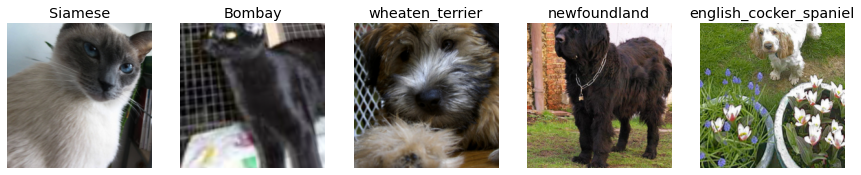

In [9]:
dls.show_batch(nrows = 1, ncols = 5)

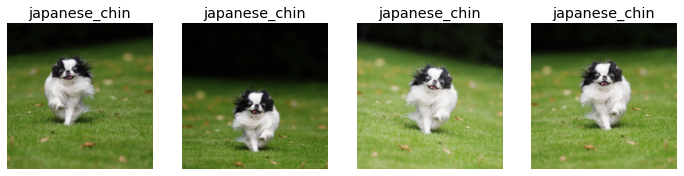

In [10]:
dls.show_batch(nrows = 1, ncols = 4, unique = True)

In [11]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/japanese_chin_101.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=338x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/japanese_chin_101.jpg
    applying partial gives
      japanese_chin
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(23)

Final sample: (PILImage mode=RGB size=338x500, TensorCategory(23))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up

In [12]:
help(vision_learner)

Help on function vision_learner in module fastai.vision.learner:

vision_learner(dls, arch, normalize=True, n_out=None, pretrained=True, loss_func=None, opt_func=<function Adam at 0x7fe3a53933b0>, lr=0.001, splitter=None, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95), cut=None, n_in=3, init=<function kaiming_normal_ at 0x7fe3d4513290>, custom_head=None, concat_pool=True, lin_ftrs=None, ps=0.5, pool=True, first_bn=True, bn_final=False, lin_first=False, y_range=None)
    Build a vision learner from `dls` and `arch`



In [13]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.519849,0.289451,0.102842,01:14


epoch,train_loss,valid_loss,error_rate,time
0,0.491624,0.270872,0.085250,01:19
1,0.332972,0.173591,0.053451,01:21


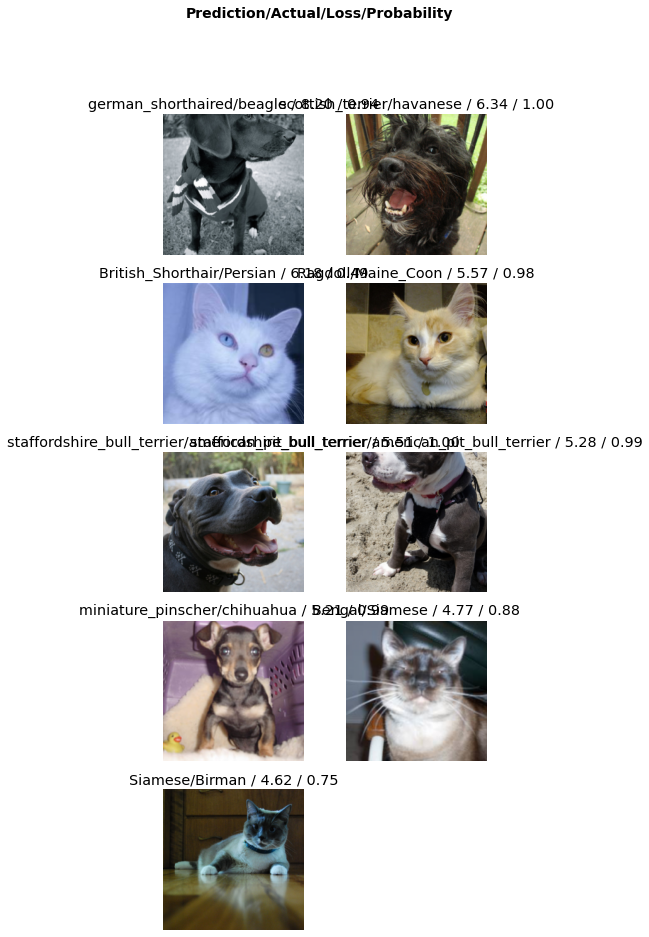

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(25, nrows = 5)

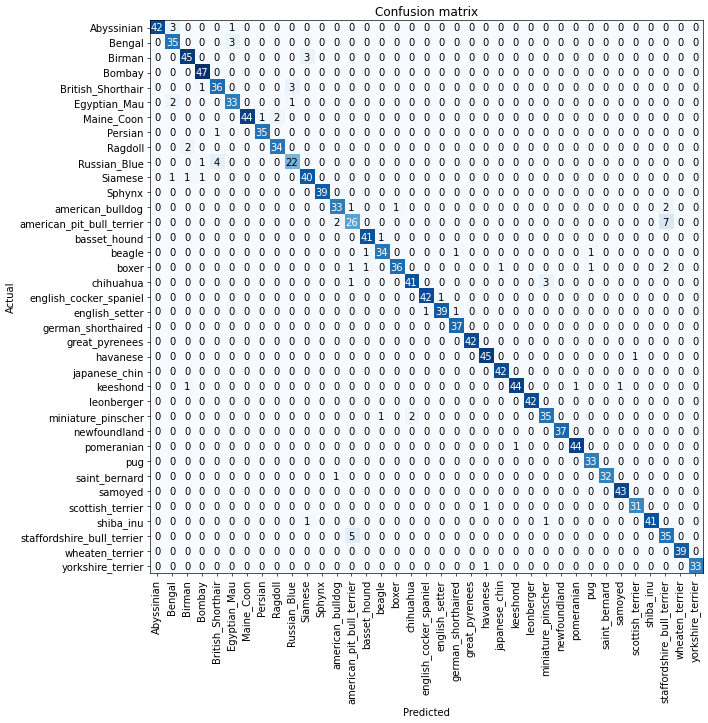

In [15]:
interp.plot_confusion_matrix(figsize = (12, 12), dpi = 60)

In [16]:
interp.most_confused(min_val = 5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

Finding the best learning rate for our model and then using that to better train our model. 

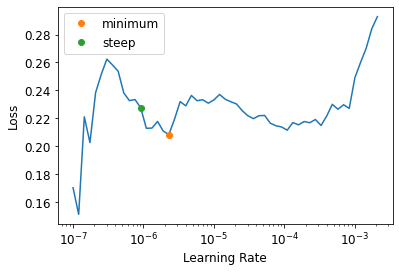

In [17]:
lr_min, lr_steep = learn.lr_find(suggest_funcs = (minimum, steep))

In [18]:
print(f"Minimum/10: {lr_min: .2e}, Steepest Point: {lr_steep: .2e}")

Minimum/10:  2.29e-07, Steepest Point:  9.12e-07


In [19]:
(9.12e-07 +  2.29e-07)/2

5.705e-07

In [20]:
learn.fine_tune(2, base_lr = 5.705e-07)

epoch,train_loss,valid_loss,error_rate,time
0,0.261546,0.173024,0.053451,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.244921,0.170623,0.056157,01:19
1,0.227123,0.171899,0.057510,01:19


The above result certainly shows that using the learning rate in between the minimum and steep values allows us to get much better error rates on all three of our epochs and less computing time as well. 